# Training yolov8 base model for license plate detection

In [ ]:
%pip install ultralytics roboflow

In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

display.clear_output()



In [2]:
model = YOLO('yolov8n.pt')
print(os.getcwd())

e:\RoboGames\Robogames-Final


## Training the model

change the path for dataset accordingly

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=datasets/cuboid-container.v2i.yolov8/data.yaml epochs=40 imgsz=640 device=0

Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/cuboid-container.v2i.yolov8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=


train: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\train\labels.cache... 423 images, 3 backgrounds, 0 corrupt: 100%|██████████| 423/423 [00:00<?, ?it/s]
train: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\train\labels.cache... 423 images, 3 backgrounds, 0 corrupt: 100%|██████████| 423/423 [00:00<?, ?it/s]

val: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\valid\labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
val: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\valid\labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]
       1/40      2.01G      1.016      3.568     0.9799         36        640:   0%|          | 0/27 [00:01<?, ?it/s]
       1/40      2.01G      1.016      3.568     0.9799         36        640:   4%|▎         | 1/27 [00:01<00:35,

In [7]:
path=os.getcwd()

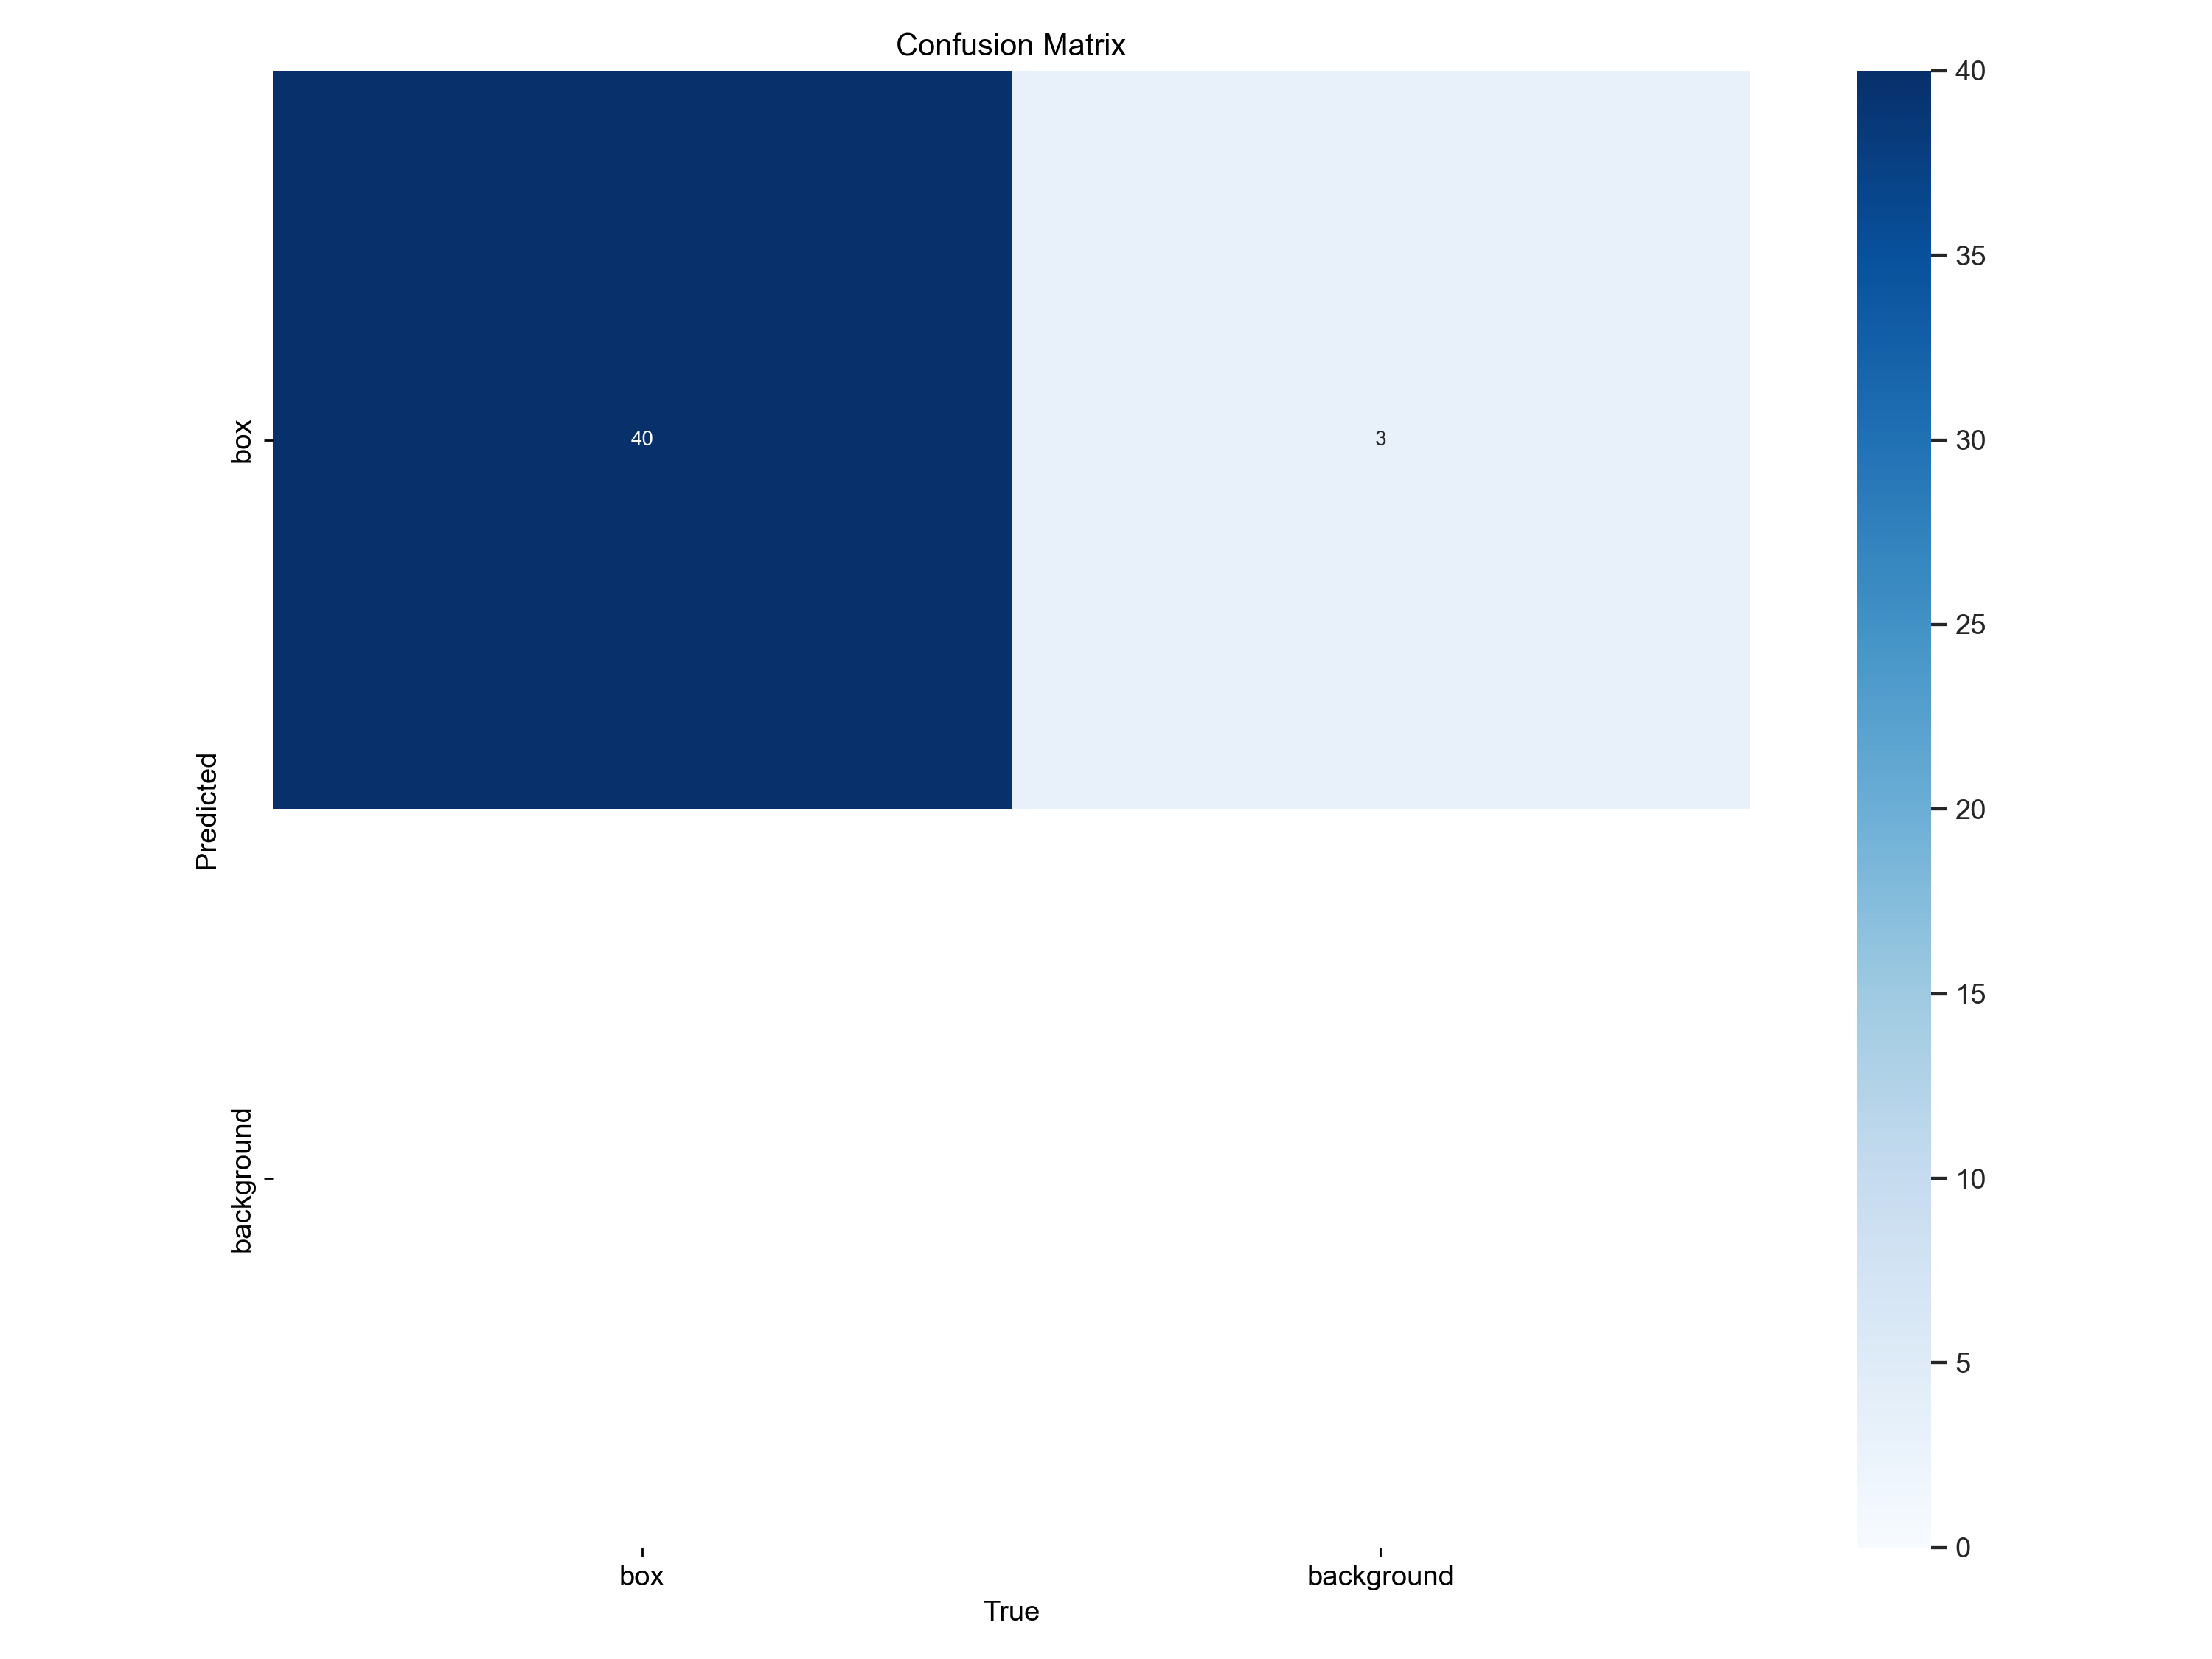

In [10]:
Image(filename=f"{path}\\runs\\detect\\train4\\confusion_matrix.png", width = 600)

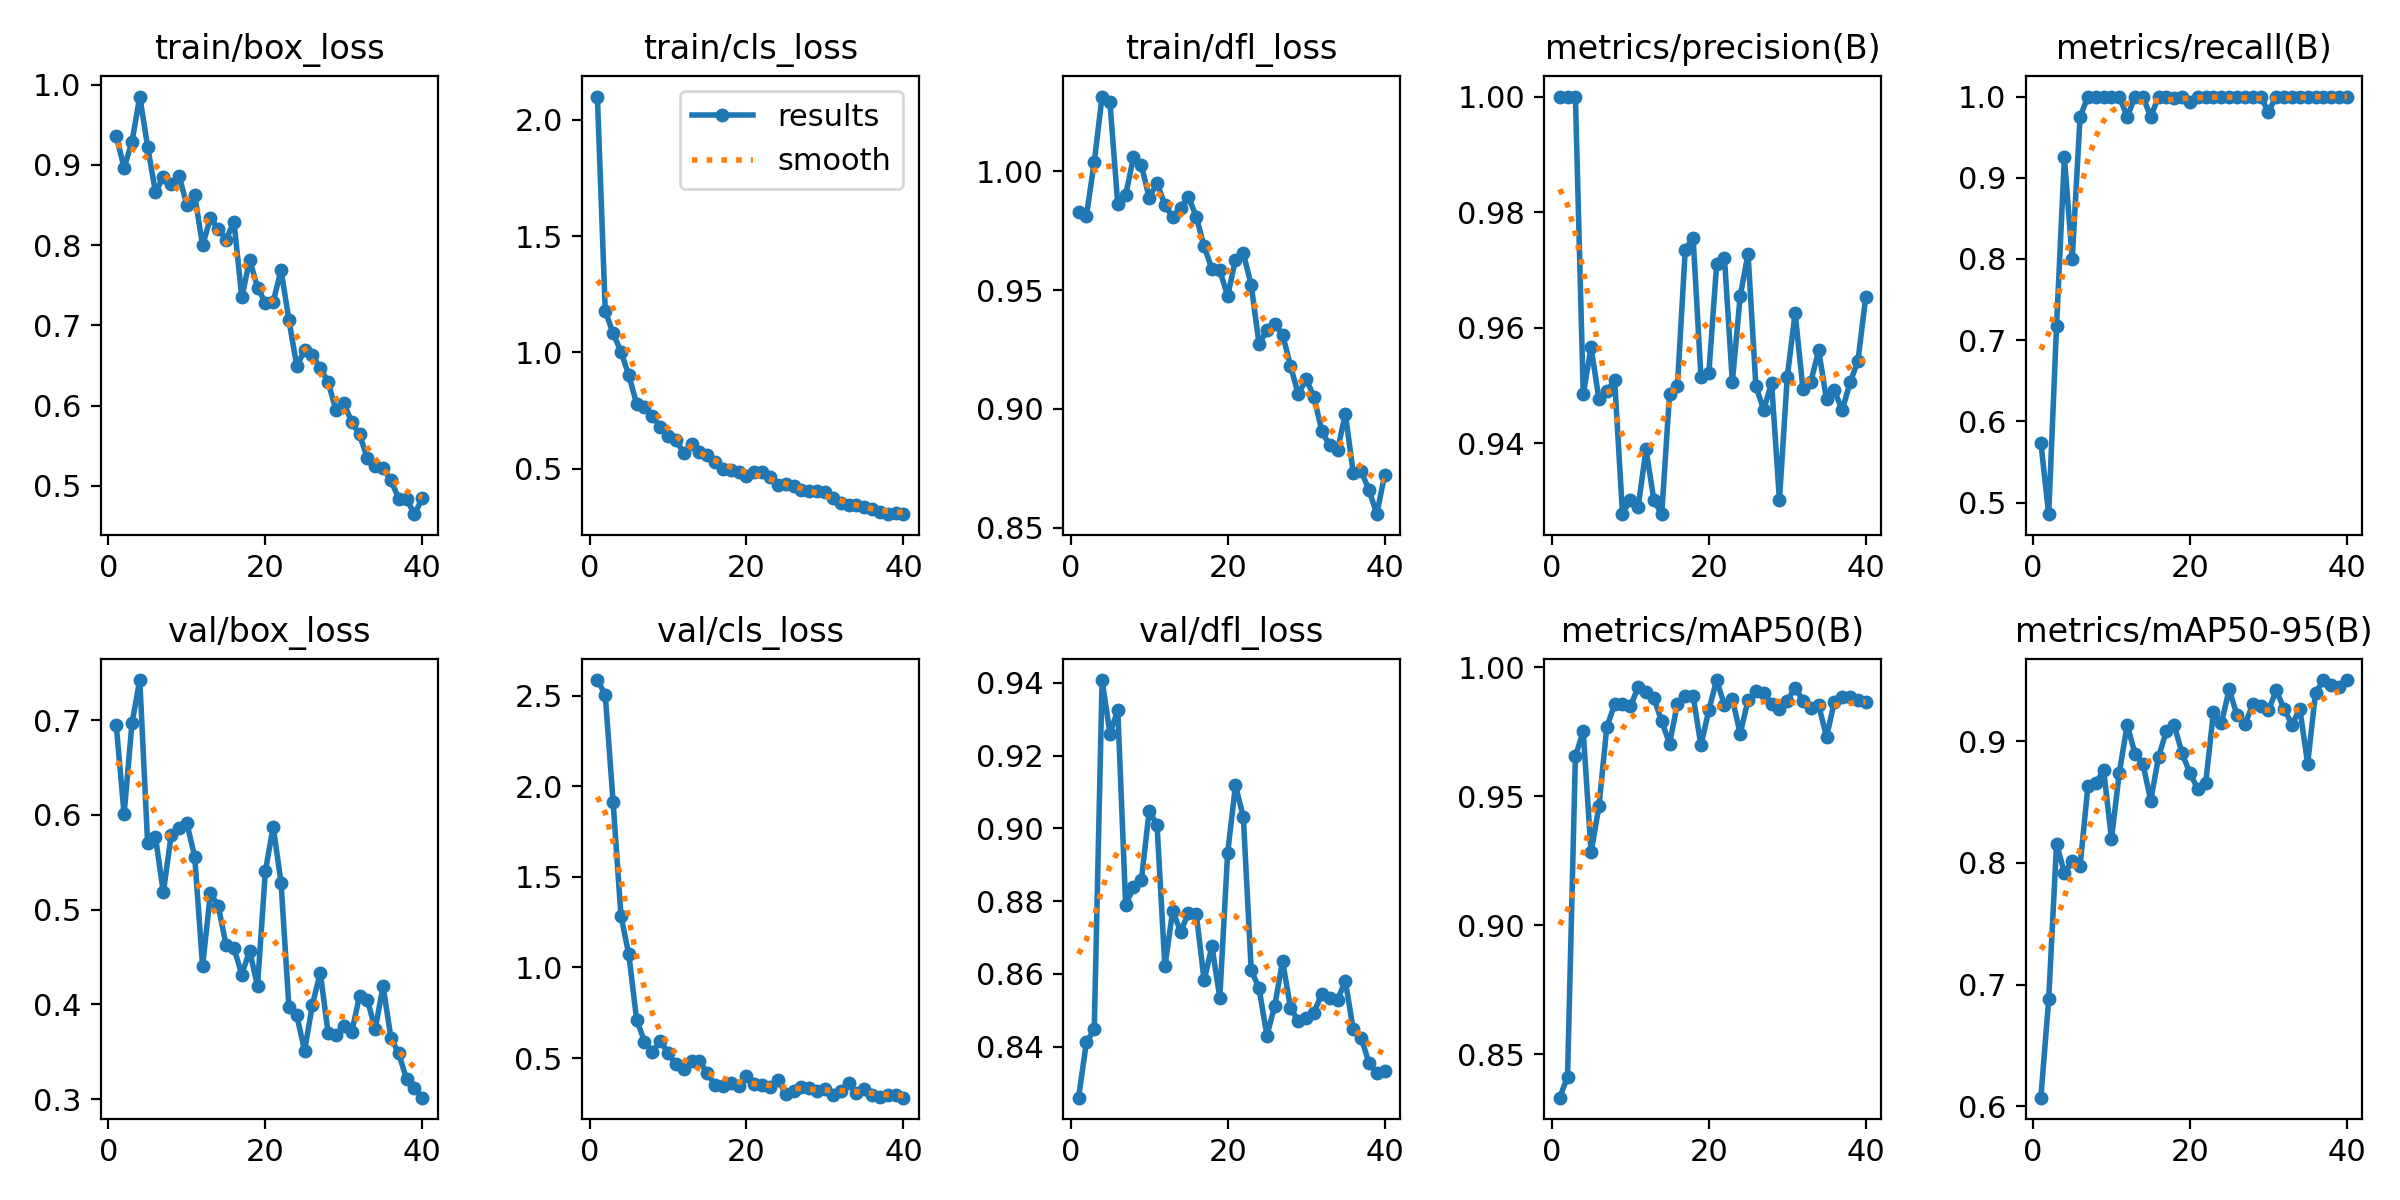

In [11]:
Image(filename=f'runs/detect/train4/results.png', width = 600)

## Validating the trained model

In [14]:
!yolo task=detect mode=val model=runs/detect/train4/weights/best.pt data=datasets/cuboid-container.v2i.yolov8/data.yaml device=0

Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
                   all         29         40      0.946          1      0.988      0.954
Speed: 2.3ms preprocess, 13.3ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\valid\labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
val: Scanning E:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\valid\labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:03<00:03,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]


## Tesiting the trained model

In [16]:
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.5 source=datasets/cuboid-container.v2i.yolov8/test/images/

Ultralytics 8.3.94 🚀 Python-3.10.16 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/38 e:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\test\images\frame_0005_jpg.rf.1913a02c6080909c56f56c60303004c5.jpg: 640x640 2 boxs, 13.4ms
image 2/38 e:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\test\images\frame_0018_jpg.rf.e5cd62b52c191ca8e5a76222bd4351d5.jpg: 640x640 2 boxs, 11.0ms
image 3/38 e:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\test\images\frame_0020_jpg.rf.47d9c2c853e63df9ae56f3ea4dd62216.jpg: 640x640 2 boxs, 18.5ms
image 4/38 e:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\test\images\frame_0025_jpg.rf.38d5bfab9fcc7bccd0375752f8c9e90f.jpg: 640x640 2 boxs, 11.3ms
image 5/38 e:\RoboGames\Robogames-Final\datasets\cuboid-container.v2i.yolov8\test\images\frame_0028_jpg.rf.4e5cd5365e5ff7e6891f4038f3eb7c2e.jpg: 640x64

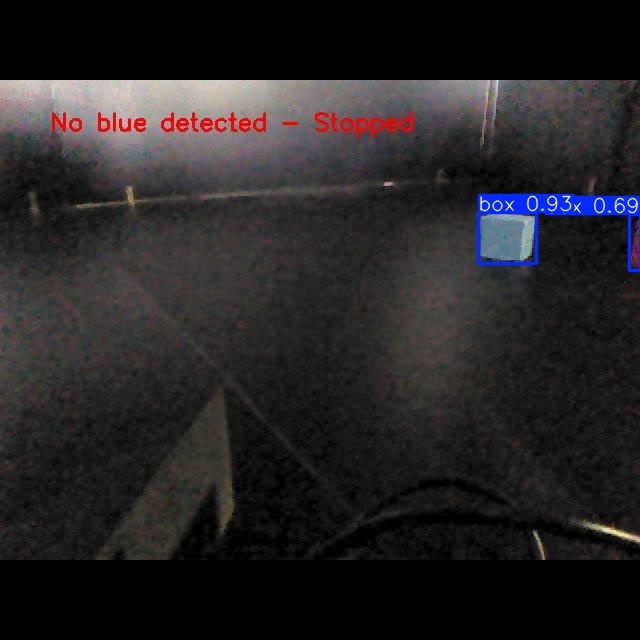

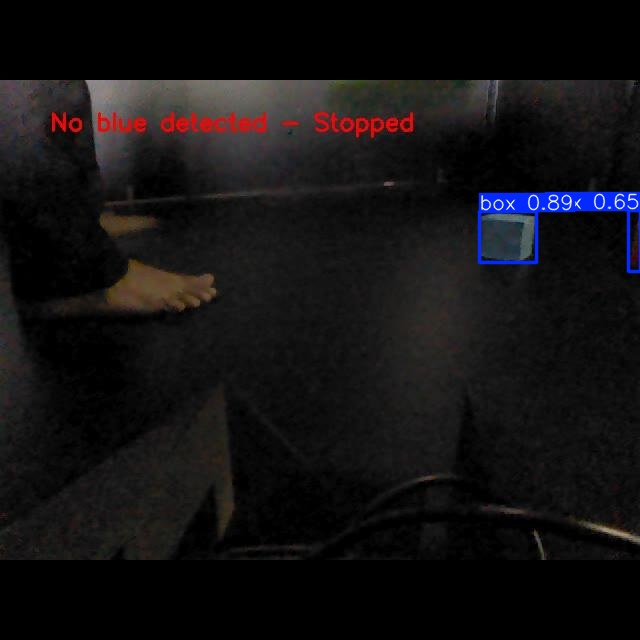

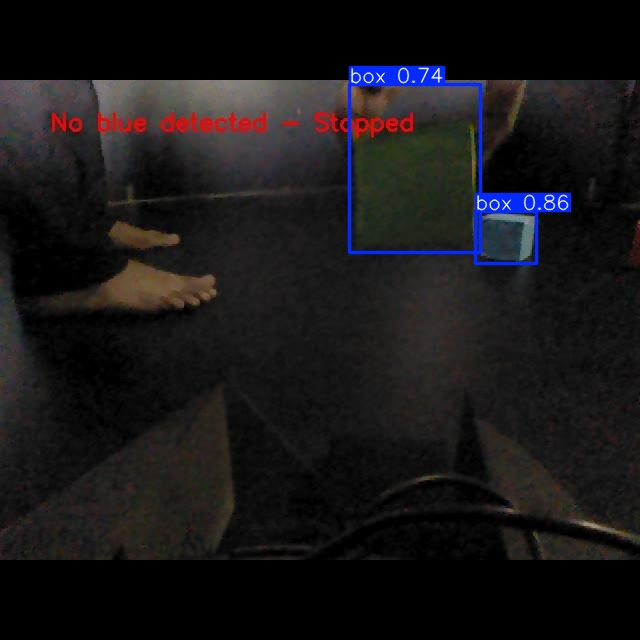

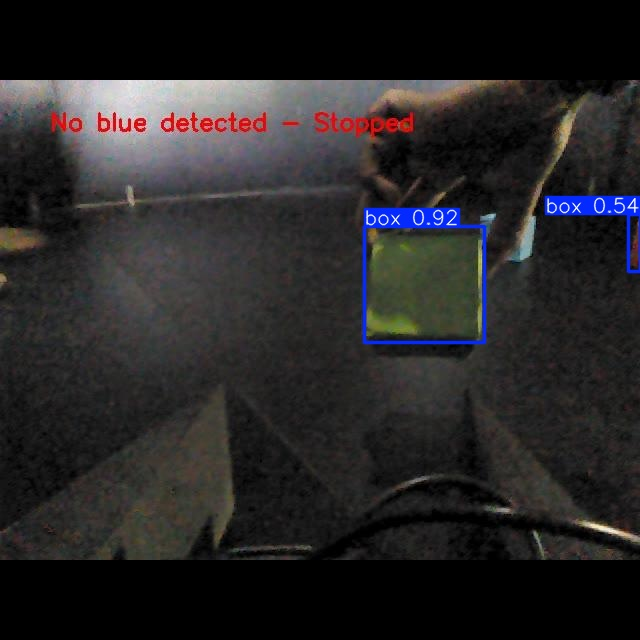

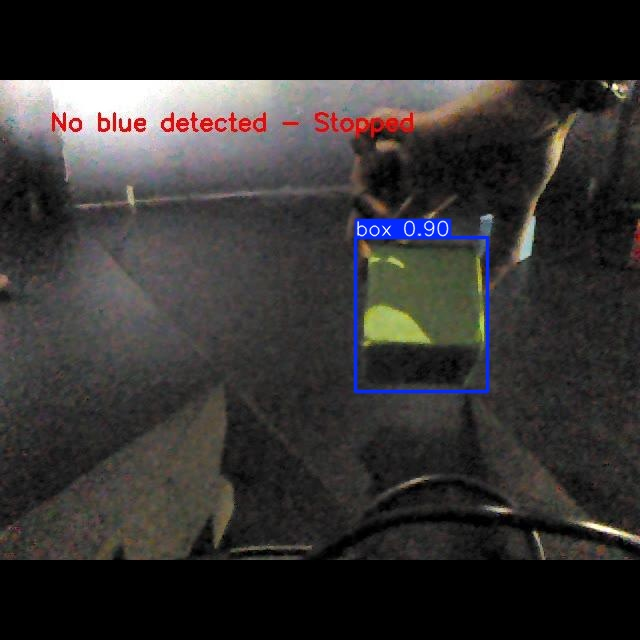

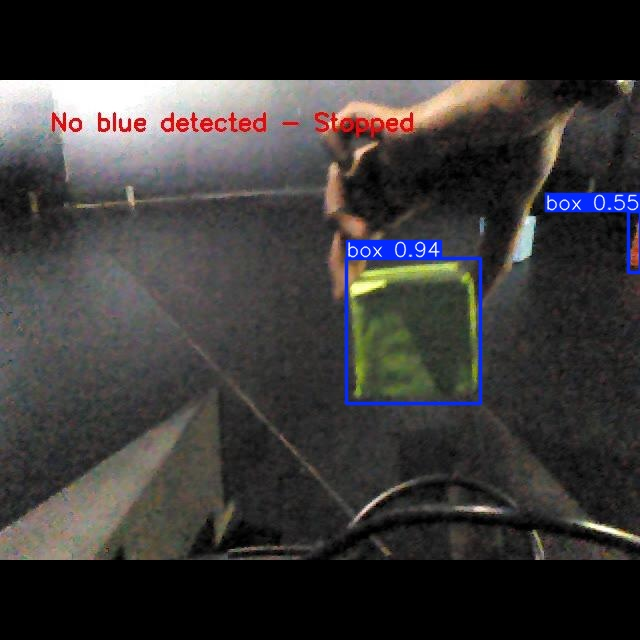

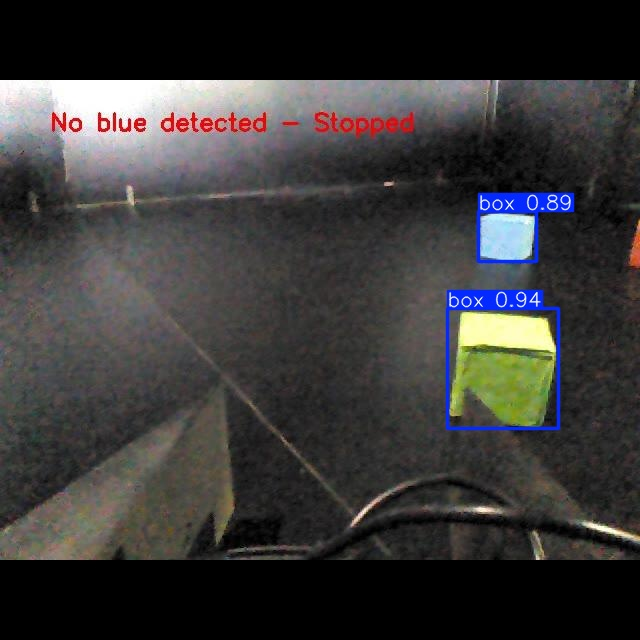

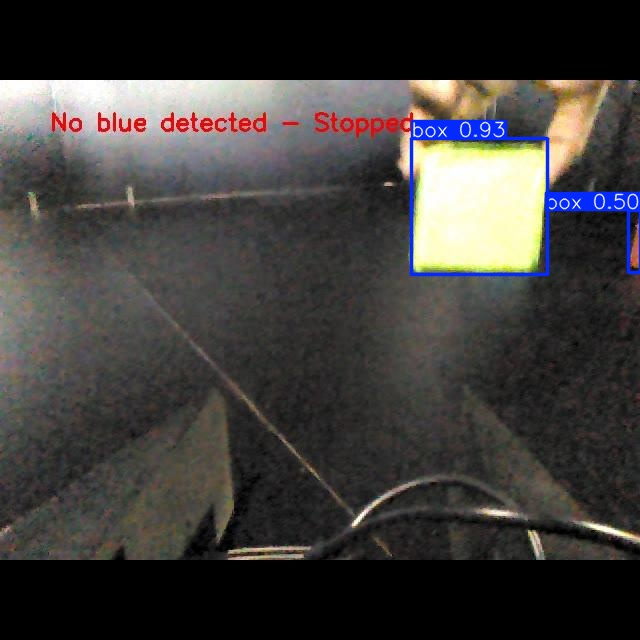

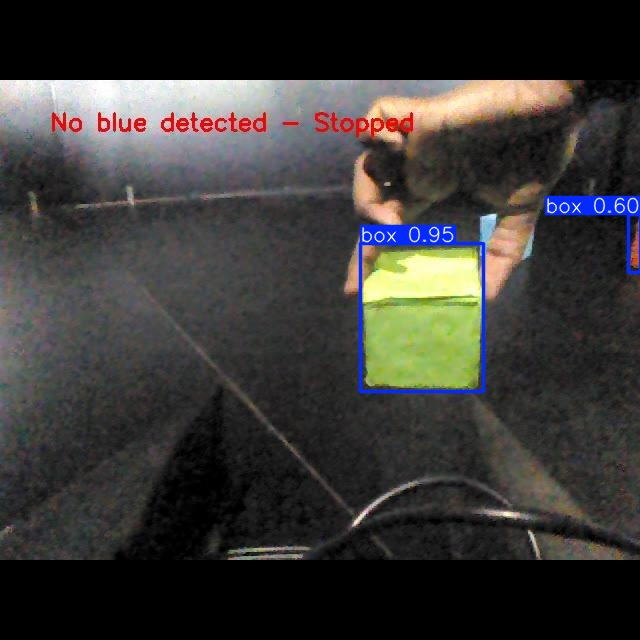

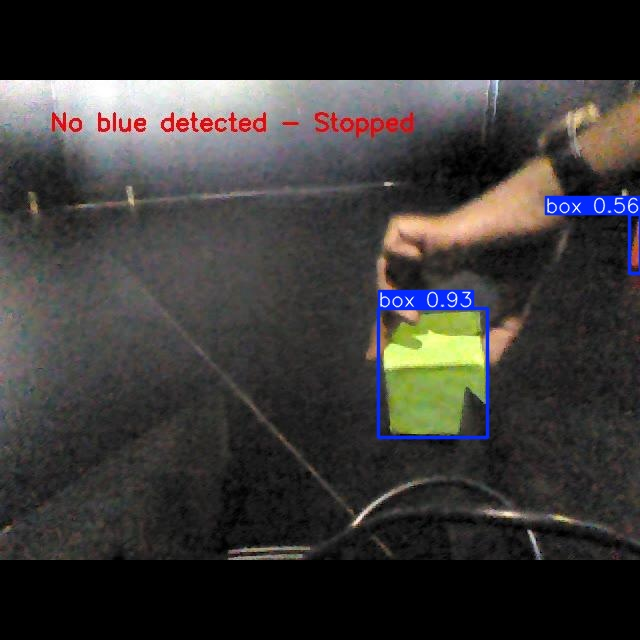

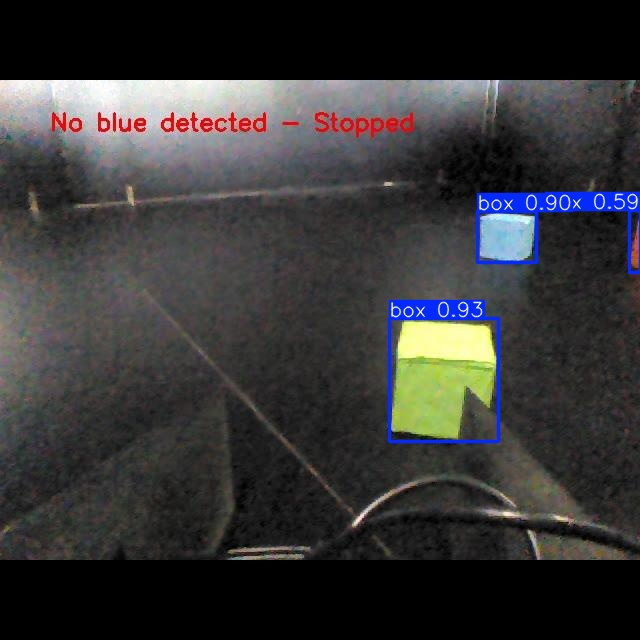

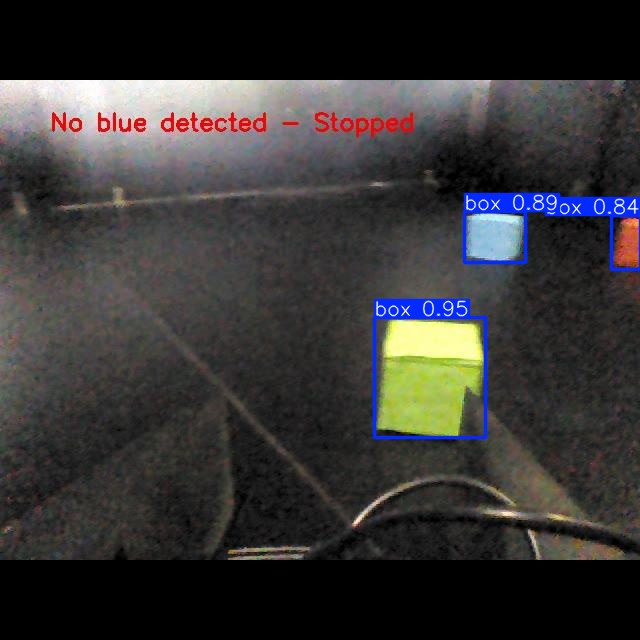

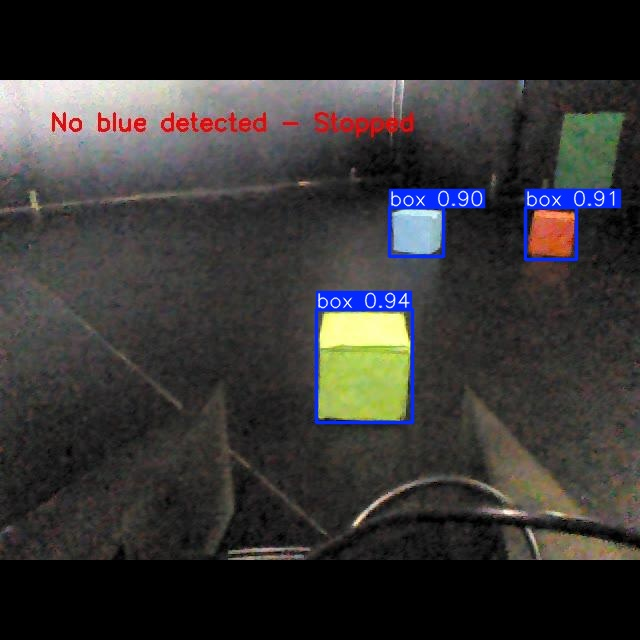

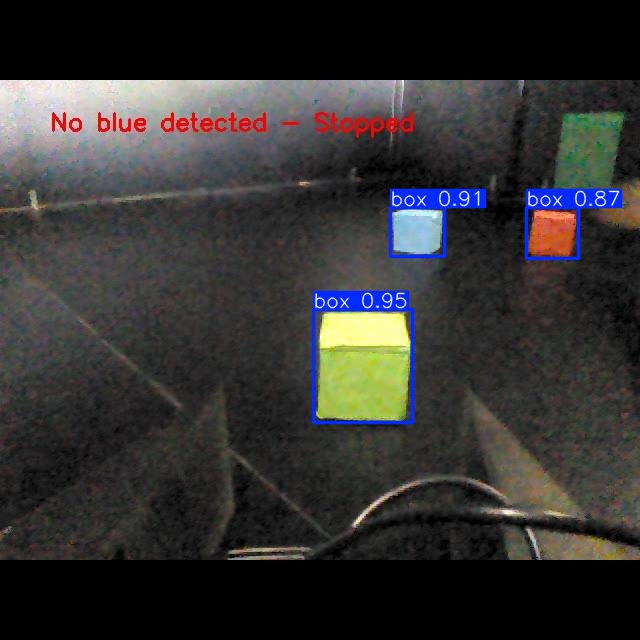

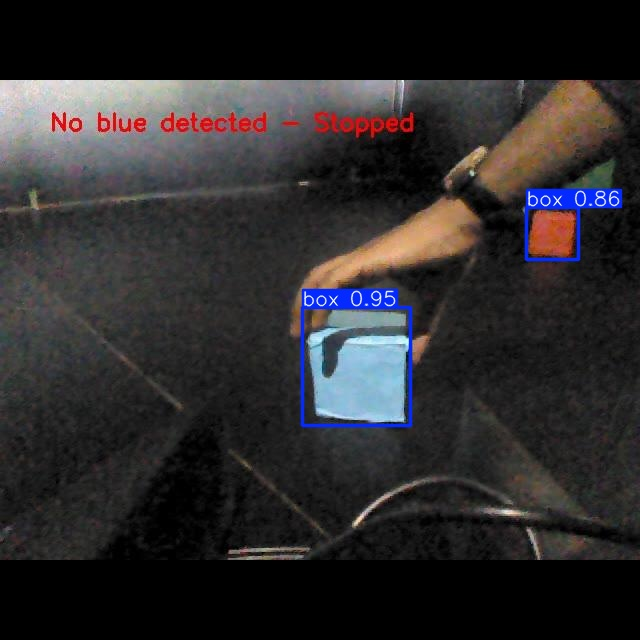

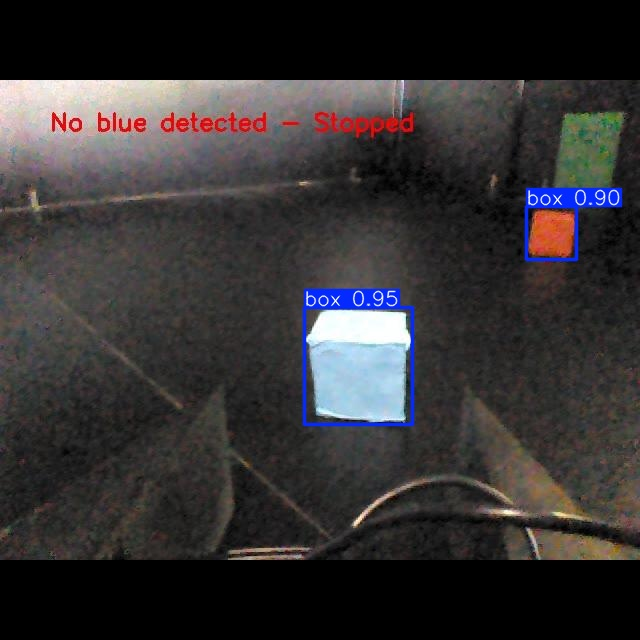

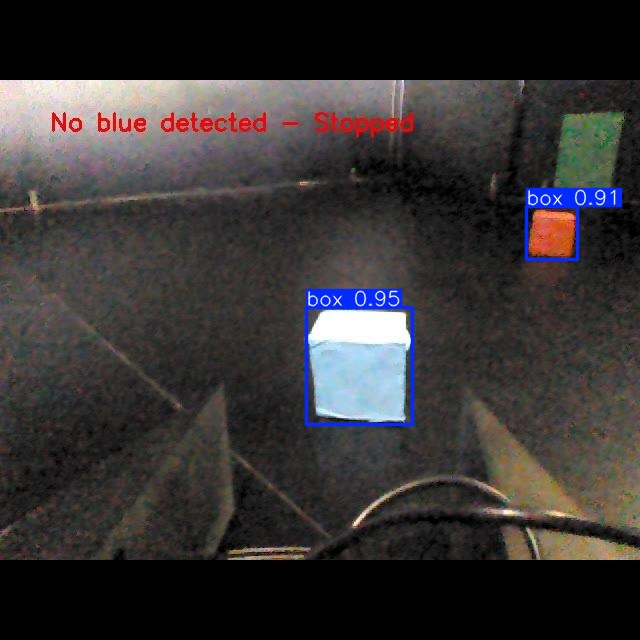

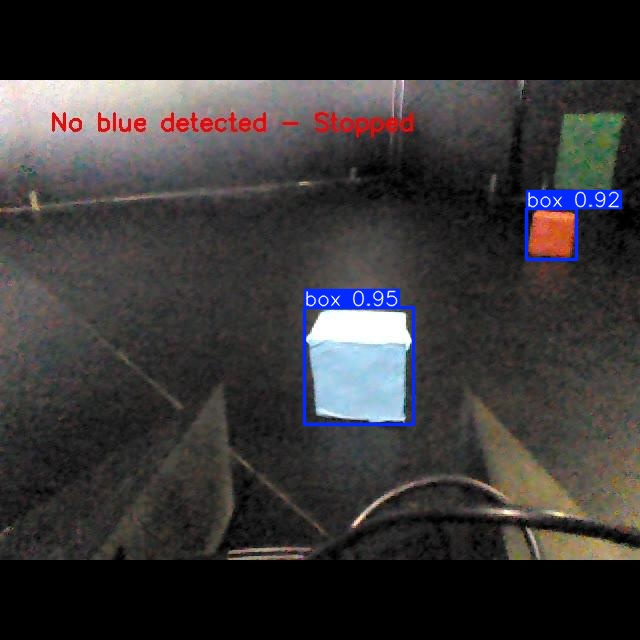

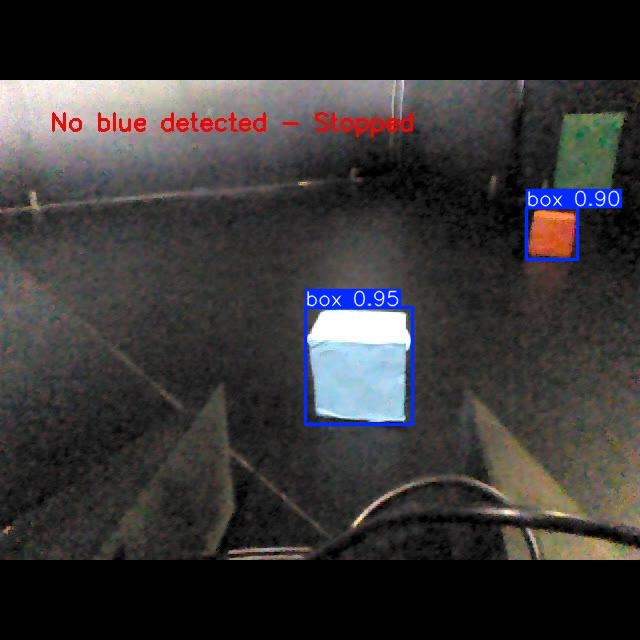

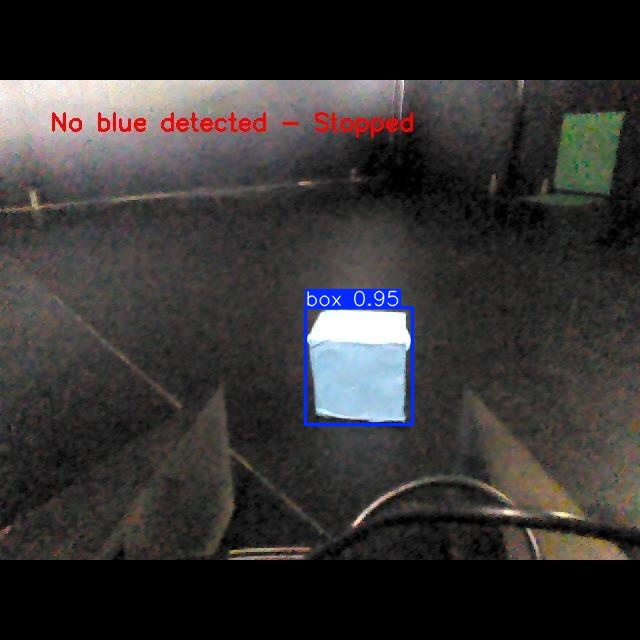

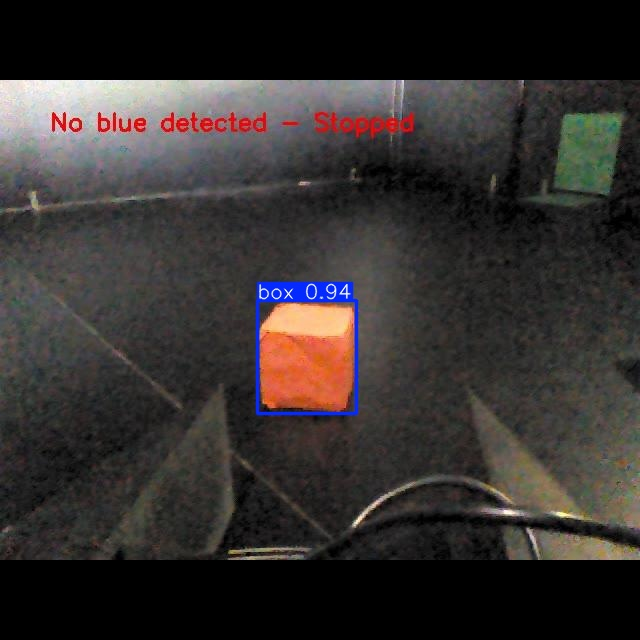

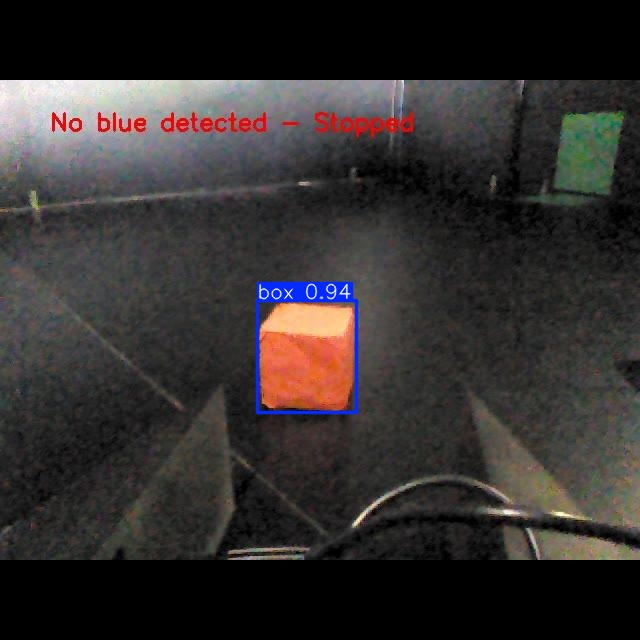

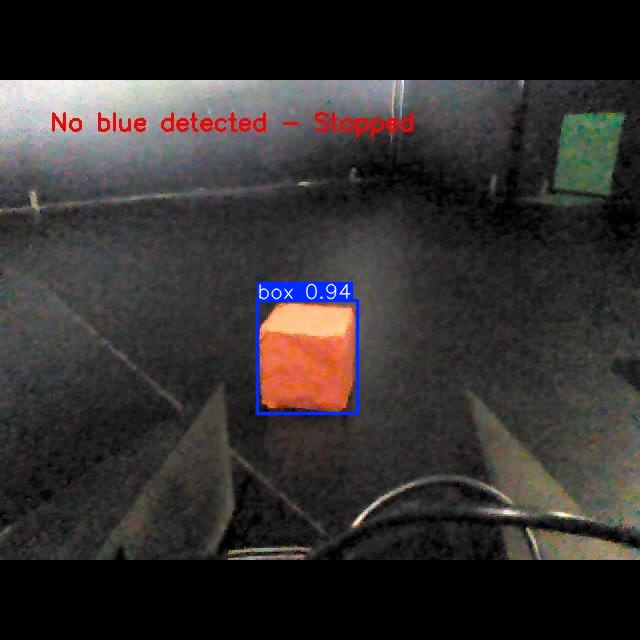

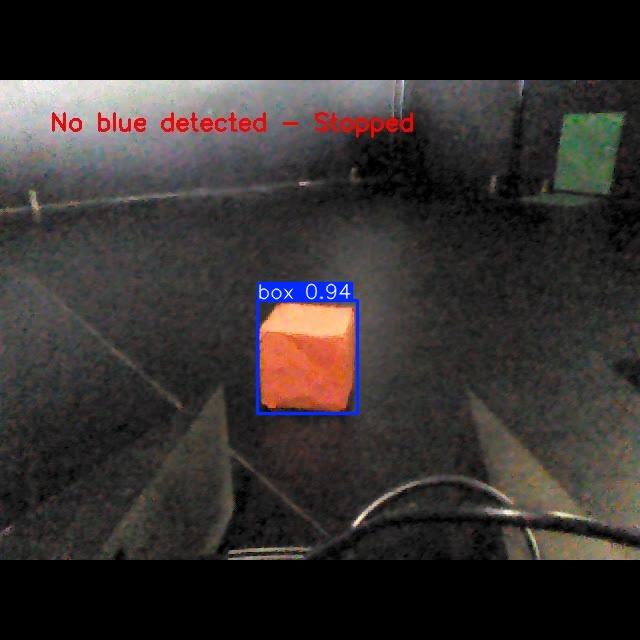

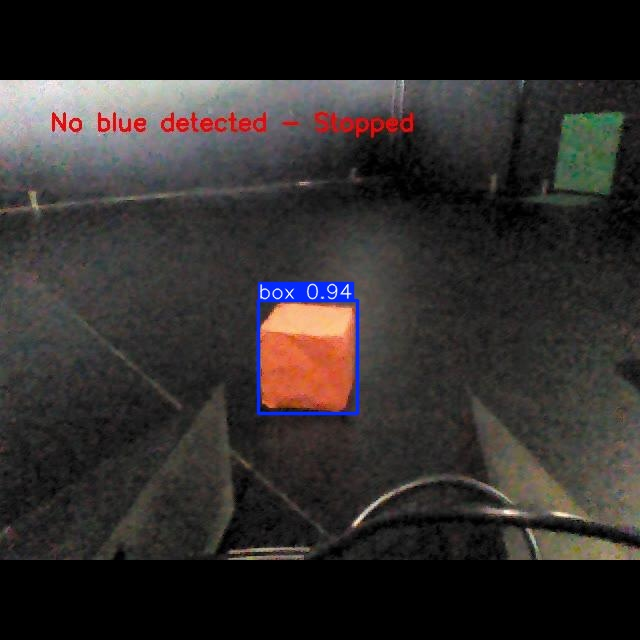

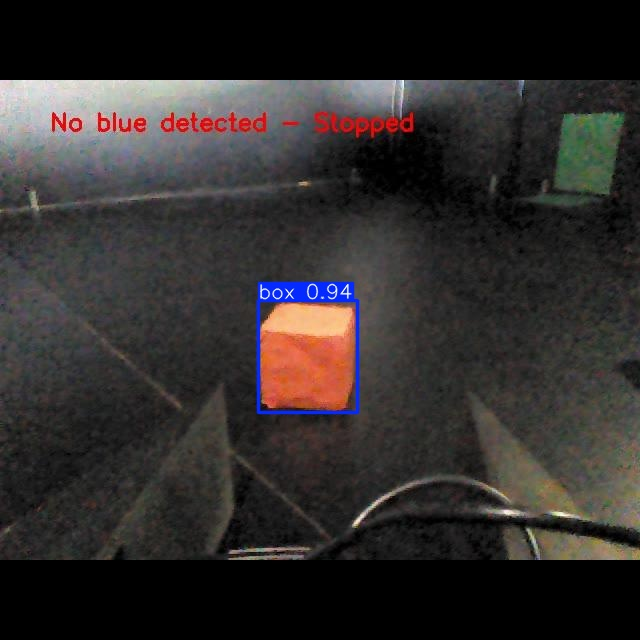

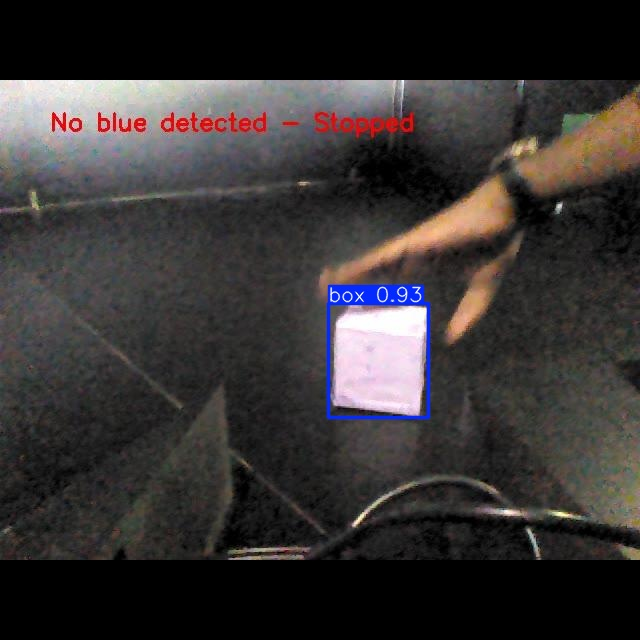

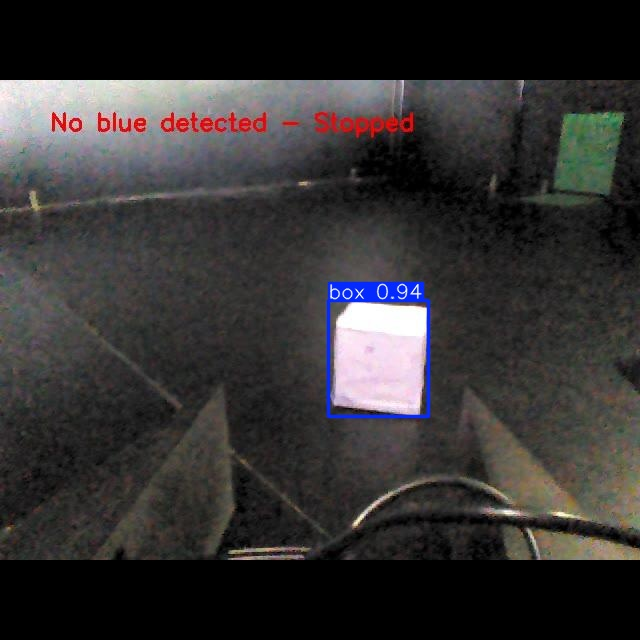

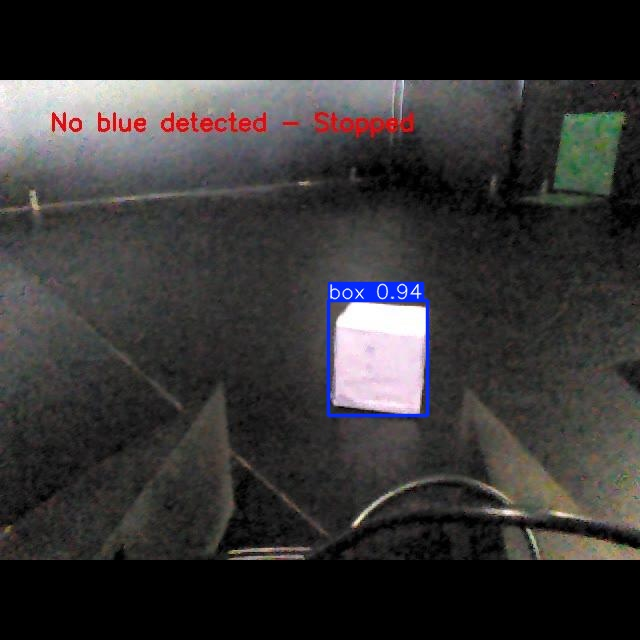

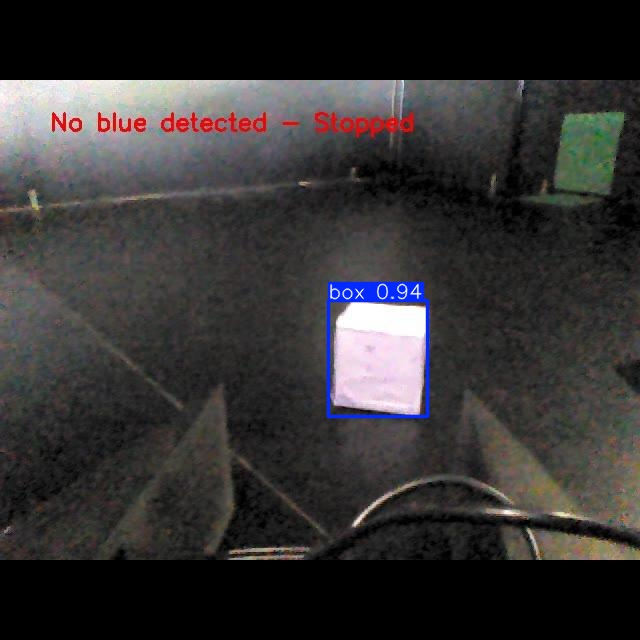

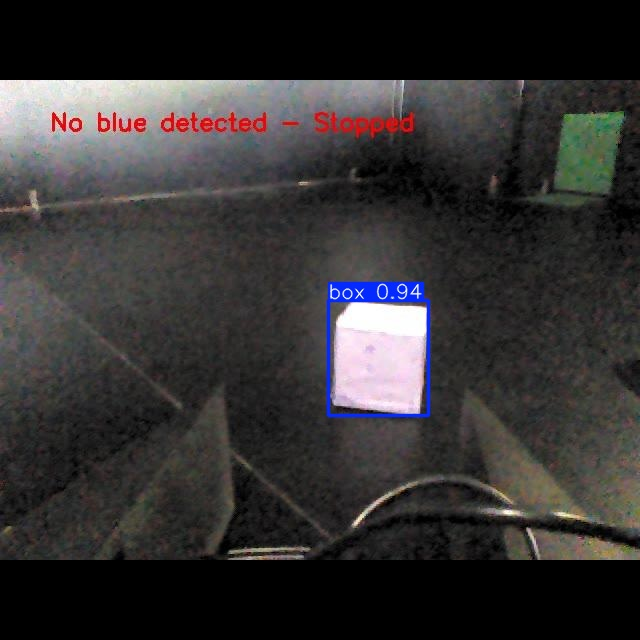

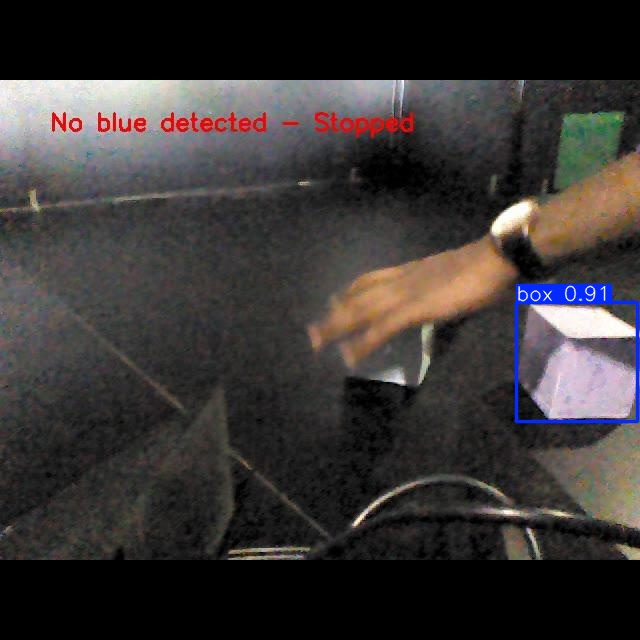

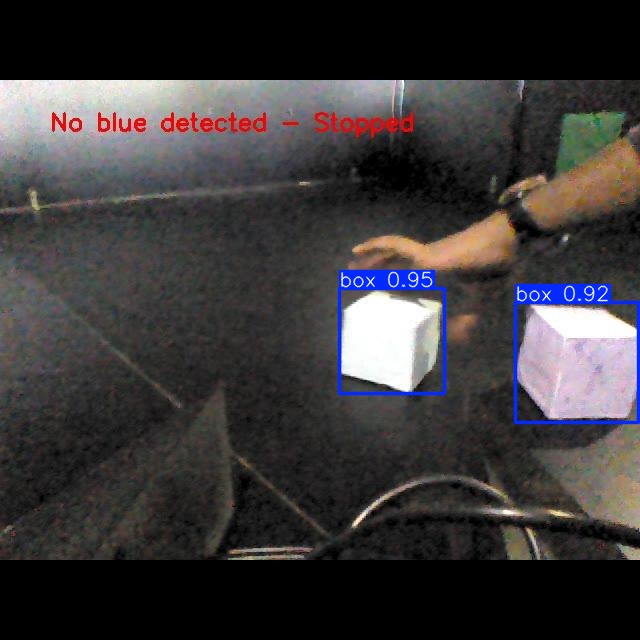

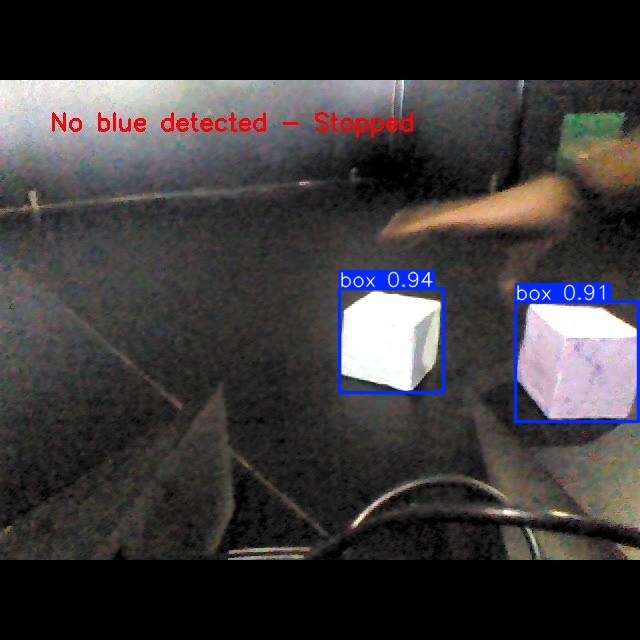

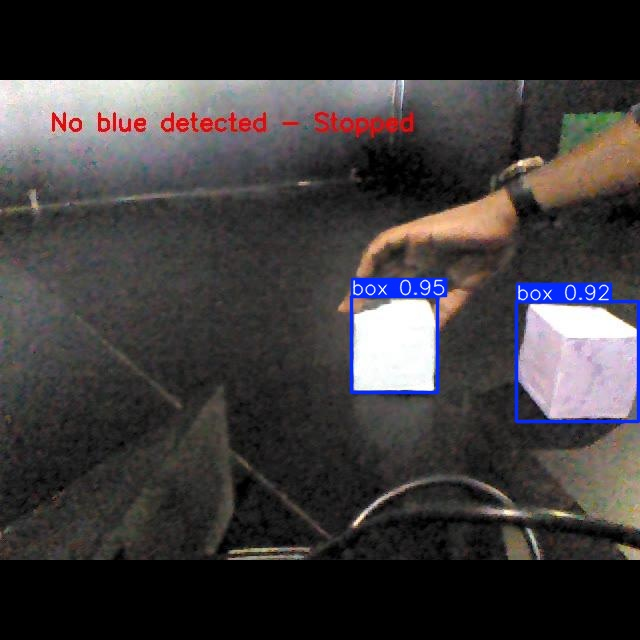

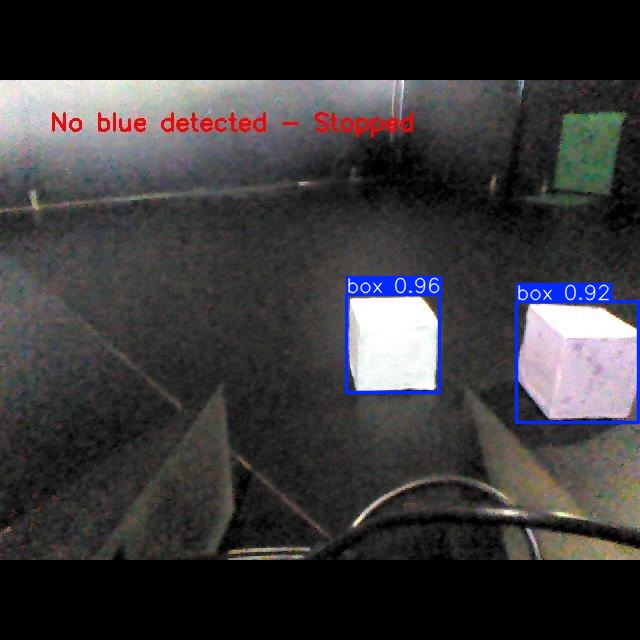

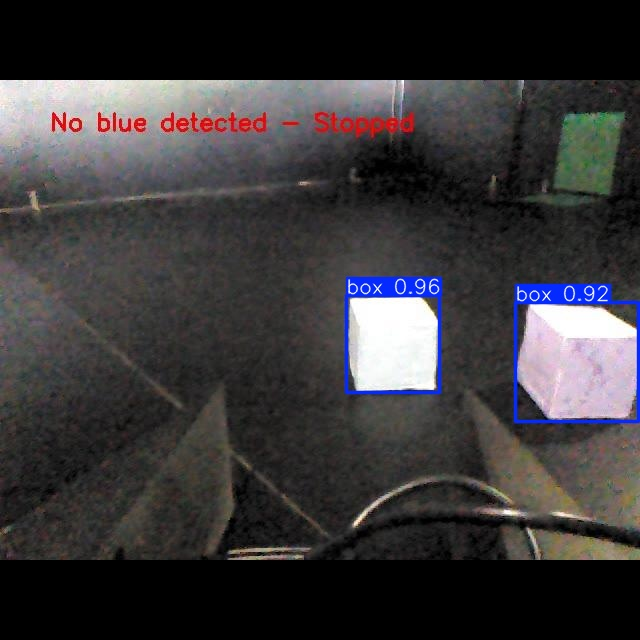

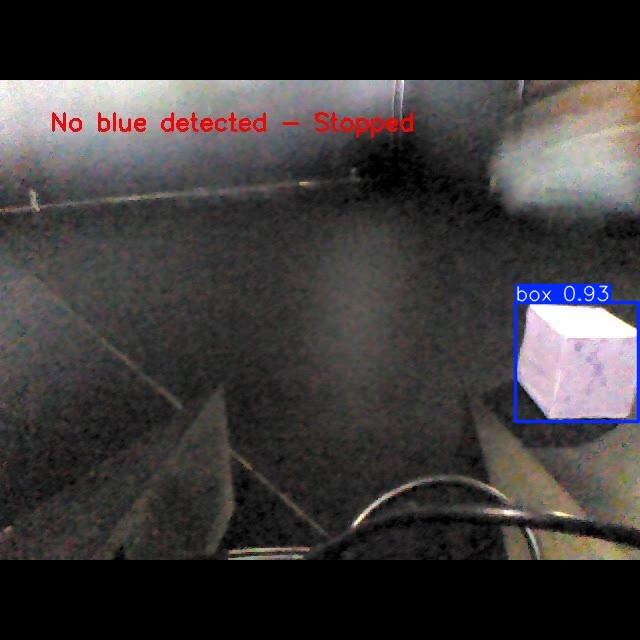

In [17]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")

## Exporting the model

In [ ]:
!pip install --no-cache-dir "sng4onnx>=1.0.1" "onnxslim>=0.1.31" "tflite_support" "onnxruntime" "protobuf" "ai-edge-litert" --extra-index-url https://pypi.ngc.nvidia.com

In [ ]:
from ultralytics import YOLO
model=YOLO('runs/detect/train10/weights/best.pt')
model.export(format='tflite')